Ainsley McLaughlin
September 27, 2024

#HW #1. Improve code Efficiency: Sort First!

## Scenario.

In a two class, classification problem, it is common to use a classifier that outputs confidences (rather than simply class labels). A good example of this is a Support Vector Machine. A pro for using such a classifier is that you gain more information -- specifically the confidence in the classification result. A con is that in order to make a final classification decision, a threshold value must be determined. For example, if a threshold of 0.75 is chosen, the class label 1 would be assigned for confidences greater than 0.75 and for confidences less than 0.75 a class label of 0 would be assigned. However, this begs the question: how is the threshold chosen?

Many data scientists will choose a threshold based on the experimental results and/or operational constraints. In this code example, we assume that we have confidences and true labels for a large data set. To determine a good threshold we will compute the true positive rates (TPRs) and false positive rates (FPRs) at all relevant thresholds. The relevant thresholds are considered those that would change the TPRs and FPRs.

In the code below, a function is defined to compute the TPR and FPR at all relevant thresholds. However, the code is not very efficient and can be improved. (Note there are tips and hints found in the comments.)

Your task is the following:

## Question 1
**40 POINTS**  
Assess the time complexity of the method computeAllTPRs(...). Provide a line-by-line assessment in comments identifying the proportional number of steps (bounding notation is sufficient) per line: eg, O(1), O(log n), O(n), etc. Also, derive a time step function T(n) for the entire method (where n is the size of input true_label).

## Question 2
**30 POINTS**  
Implement a new function computeAllTPRs_improved(...) which performs the same task as computeAllTPRs but has a significantly reduced time complexity. Also provide a line-by-line assessment in comments identifying the proportional number of steps per line, and derive a time step function T(n) for the entire method (where n is the size of input true_label).

## Question 3
**30 POINTS**  
Compare the theoretical time complexities of both methods and predict which is more efficient. Next, test your prediction by timing both methods on sample inputs of varying sizes. Create a plot of inputSize vs runtime (as done in similar class examples).  

**NOTE: Do not include runtimes for graphing**

**TOTAL POINTS: 100**

---

In [30]:
import matplotlib.pyplot as plt
import random
from copy import deepcopy
from numpy import argmax
#other imports
import sys
import time 
from numpy import median

Answer Question #1 in the comments of the code chunk below.

In [31]:
def computeAllTPRs(true_label, confs):
        '''

        inputs:
         - true_label: list of labels, assumed to be 0 or 1 (a two class problem)
         - confs: list of confidences

        This method computes the True Positive Rate (TPRs) and FPRs for all relevant
        thresholds given true_label and confs. Relevant thresholds are considered
        all different values found in confs.
        '''

        # Define / initialize  variables
        sentinelValue = -1 # used to replace max value found thus far # O(1)
        totalPositives = sum(true_label) #O(1)
        totalNegatives = len(true_label) - totalPositives #O(1) since true_labels is not variable in size
        truePositives = 0 #O(1)
        falsePositives = 0 #O(1)
        # Hint: Consider Memory Management
        truePositiveRate = [] #O(1)
        falsePositiveRate = [] #O(1)

        #Hint: Although not explicitly clear, the loop structure below is an
            #embeded loop ie, O(n^2) ... do you see why??
        #Hint: If you sort the confidences first you can improve the iteration scheme.

        # Iterate over all relevant thresholds. Compute TPR and FPR for each and
        # append to truePositiveRate , falsePositiveRate lists.

        for i in range(len(confs)): #O(n)
          maxVal = max(confs)  # O(n) since the max fuction interates over the list and finds the greatest valye
          argMax = argmax(confs) #O(n) since it interates through and returns the index of the maximum element
          confs[argMax] = sentinelValue #O(1)
          if true_label[argMax]==1: #O(1)
            truePositives += 1 #O(1)
          else:
            falsePositives += 1 #O(1)
          if totalPositives !=0: # added this
            truePositiveRate.append(truePositives/totalPositives) #O(1)
          else: # added this
             truePositiveRate.append(0) # added this
          if totalNegatives !=0: #added this
            falsePositiveRate.append(falsePositives/totalNegatives) #O(1)
          else: # added
             falsePositiveRate.append(0) # added


#### Computing the T(n)
T(n)=O(1)+O(1)+O(1)+O(1)+O(1)+O(1)+O(1)+O(n)+O(n^2)+O(n^2)+O(n)+O(n)+O(n)+O(n)+O(n)+O(n)=O(n^2)

In [32]:
def testComputeAllTPRs(numSamples):

  confList = [] #O(1)
  labels = []  #O(1)
  maxVal = 10000 #O(1)
  for i in range(0,numSamples): #O(n)
    n = random.randint(1,maxVal) # O(logn)
    confList.append(n/maxVal) # O(1)
    if n/maxVal > .5: #O(1)
      lab = 1 #O(1)
    else:
      lab = 0 #O(1)
    labels.append(lab) # O(1)
  computeAllTPRs(labels, deepcopy(confList))  # Why a deepcopy here? # The time complexity of the above funciton is O(n^2), would this be the case?

#### Question 2:
Below, provide your implementation for Question #2.

In [33]:
def computeAllTPRs_improved(true_label, confs):
    '''
    inputs:
     - true_label: list of labels, assumed to be 0 or 1 (a two-class problem)
     - confs: list of confidences
     
    This method computes the True Positive Rate (TPRs) and False Positive Rates (FPRs) 
    for all relevant thresholds given true_label and confs.
    '''
    #Total positives and negatives
    totalPositives = sum(true_label) #O(1) # all the 1's added up in true labels
    totalNegatives = len(true_label) - totalPositives #O(1) since true_labels is not variable in size # the length of that list minus the total number of 1's which is total number of 0's in the list
        
    #Initialize counters for TPR and FPR
    truePositives = 0 #O(1)
    falsePositives = 0 #O(1)
    
    #Lists to store TPRs and FPRs at each threshold
    # Hint: Consider Memory Management
    truePositiveRate = []*len(true_label) #O(1) make into static arrays of length of the true_label
    falsePositiveRate = []*len(true_label) #O(1) also static

    # taking the lists and zipping them together: so each element in true_label is associated with each element in conf like: [(0.3,1,(0.9,1),(0.7,0), etc]
    combined=list(zip(confs, true_label)) # O(n)
    # sort the tuples by the confidence level (sorted function does by the first item in the tuple), now looks like [(0.3,1),(0.7,0),(0.9,1) etc]
    comb_sorted=sorted(combined) #O(nlogn)


    # for each tuple pair in the sorted list of tuples, if the label is 1, add to the TP if not add to FP, and at each iteration, add the rates to the lists
    for c,l in comb_sorted: #O(n) 
        if l==1: #O(1)
            truePositives += 1 #O(1)
        else:
            falsePositives += 1 #O(1)

        #at each iteration, add the true pos and true neg rates to the lists keeping track, to avoid division by zero, check that first
        if totalPositives!=0:
            truePositiveRate.append(truePositives/totalPositives) #O(1) # for each iteration, add
        else:
            truePositiveRate.append(0) # O(1), # in case of division by zero, append a placeholder
        if totalNegatives!=0:
            falsePositiveRate.append(falsePositives/totalNegatives) #O(1)
        else:
            falsePositiveRate.append(0) #O(1)
    


#### T(n) of the improved function
T(n)=O(1)+O(1)+O(1)+O(1)+O(1)+O(1)+O(n)+O(nlogn)+O(n)+O(n)+O(n)+O(n)+O(n)+O(n)+O(n)= T(nlogn)

In [34]:
def testComputeAllTPRs_improved(numSamples):

  confList = [] #O(1)
  labels = []  #O(1)
  maxVal = 10000 #O(1)
  for i in range(0,numSamples): #O(n)
    n = random.randint(1,maxVal) # O(logn)
    confList.append(n/maxVal) # O(1)
    if n/maxVal > .5: #O(1)
      lab = 1 #O(1)
    else:
      lab = 0 #O(1)
    labels.append(lab) # O(1)
  computeAllTPRs_improved(labels, deepcopy(confList))

In [35]:
# SCRATCH WORK to see my process:
# testing out some things for problem 2:
# associated the values
true_labels=[0,1,1,1,0,0,1,0]
conf=[0.3,0.6,0.7,0.4,0.5, 0.8,0.2,0.9]
combined=list(zip(conf, true_labels))
print(combined)
comb_sorted=sorted(combined)
print(comb_sorted)


[(0.3, 0), (0.6, 1), (0.7, 1), (0.4, 1), (0.5, 0), (0.8, 0), (0.2, 1), (0.9, 0)]
[(0.2, 1), (0.3, 0), (0.4, 1), (0.5, 0), (0.6, 1), (0.7, 1), (0.8, 0), (0.9, 0)]


### Question #3. 
Below, provide your code which records and plots the runtime for the original and improved methods.

Compare the theoretical time complexities of both methods and predict which is more efficient. Next, test your prediction by timing both methods on sample inputs of varying sizes. Create a plot of inputSize vs runtime (as done in similar class examples). 

In [36]:
def original(n):
    start = time.perf_counter() 
    testComputeAllTPRs(n)
    end=time.perf_counter()
    return(end-start)

def improved(n):
    start = time.perf_counter() 
    testComputeAllTPRs_improved(n)
    end=time.perf_counter()
    return(end-start)



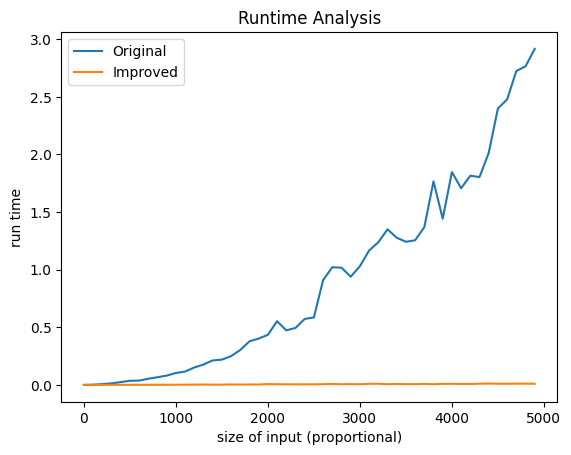

In [39]:
maxN = 5000# max insertions to list to set termination condition
n = 2  # initialize number of insertions 
x,y_original,y_improved = list(), list(),list()
while n <= maxN:   
  x.append(n)
  y_original.append(original(n))
  y_improved.append(improved(n))
  n += 100
 
#Plots:

# display results
plt.plot(x, y_original, label = 'Original') 
plt.plot(x, y_improved, label = 'Improved') 
plt.legend(frameon = 'none')
plt.title('Runtime Analysis')
plt.xlabel('size of input (proportional)') #???????????????
plt.ylabel('run time')
plt.show() 

